<p style="font-family: Arials; font-size: 20px;text-align: center;; font-style: normal;line-height:1.3">The objective of this competition is to predict the probability that a customer does not pay back their credit card balance amount in the future based on their monthly customer profile. </p>

The dataset contains aggregated profile features for each customer at each statement date. Features are anonymized and normalized, and fall into the following general categories:

- `D_*` = Delinquency variables
- `S_*` = Spend variables
- `P_*` = Payment variables
- `B_*` = Balance variables
- `R_*` = Risk variables

With the following features being categorical:`B_30`,`B_38`,`D_114`,`D_116`,`D_117`,`D_120`,`D_126`,`D_63`,`D_64`, `D_66`,`D_68`

Your task is to predict, for each customer_ID, the probability of a future payment default (target = 1).

## Importing Libraries and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from itertools import cycle

import warnings, gc
warnings.filterwarnings('ignore')

In [9]:
import matplotlib.colors

In [11]:
temp=dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), 
                           height=500, width=1000))

## Loading the Dataset

In [8]:
df_train = pd.read_feather('../input/amexfeather/train_data.ftr')
df_train = df_train.groupby('customer_ID').tail(1).set_index('customer_ID')

df_test = pd.read_feather('../input/amexfeather/test_data.ftr')
df_test = df_test.groupby('customer_ID').tail(1).set_index('customer_ID')

df_subm = pd.read_csv("../input/amex-default-prediction/sample_submission.csv")

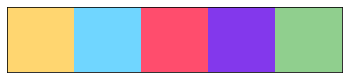

In [14]:
#Custom Color Palette 🎨
custom_colors = ["#ffd670","#70d6ff","#ff4d6d","#8338ec","#90cf8e"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1.2)
plt.tick_params(axis='both', labelsize=0, length = 0)

In [4]:
df_train_row_count, df_train_column_count=df_train.shape
print('Total number of rows (Train):', df_train_row_count)
print('Total number of columns (Train):', df_train_column_count)

Total number of rows (Train): 458913
Total number of columns (Train): 190


In [5]:
df_test_row_count, df_test_column_count=df_test.shape
print('Total number of rows (Test):', df_test_row_count)
print('Total number of columns (Test):', df_test_column_count)

Total number of rows (Test): 924621
Total number of columns (Test): 189


In [6]:
df_train['S_2'] = pd.to_datetime(df_train['S_2'])
df_test['S_2'] = pd.to_datetime(df_test['S_2'])

In [7]:
print('Duration (Train Date): ', df_train['S_2'].min(), df_train['S_2'].max())
print('Duration (Test Date): ', df_test['S_2'].min(), df_test['S_2'].max())

Duration (Train Date):  2018-03-01 00:00:00 2018-03-31 00:00:00
Duration (Test Date):  2019-04-01 00:00:00 2019-10-31 00:00:00


In [8]:
df_train.head()

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2018-03-13,0.934570,0.009117,0.009384,1.007812,0.006104,0.135010,0.001604,0.007175,NaN,...,NaN,NaN,0.007187,0.004234,0.005085,NaN,0.005810,0.002970,0.008530,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,2018-03-25,0.880371,0.178101,0.034698,1.003906,0.006912,0.165527,0.005550,0.005070,NaN,...,NaN,NaN,0.002981,0.007481,0.007874,NaN,0.003284,0.003170,0.008514,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,2018-03-12,0.880859,0.009705,0.004284,0.812500,0.006451,NaN,0.003796,0.007195,NaN,...,NaN,NaN,0.007381,0.006622,0.000965,NaN,0.002201,0.000834,0.003445,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,2018-03-29,0.621582,0.001082,0.012566,1.005859,0.007828,0.287842,0.004532,0.009941,NaN,...,NaN,NaN,0.002705,0.006184,0.001899,NaN,0.008186,0.005558,0.002983,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,2018-03-30,0.872070,0.005573,0.007679,0.815918,0.001247,NaN,0.000231,0.005527,NaN,...,NaN,NaN,0.002974,0.004162,0.005764,NaN,0.008156,0.006943,0.000905,0


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458913 entries, 0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a to fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681
Columns: 190 entries, S_2 to target
dtypes: category(11), datetime64[ns](1), float16(177), int64(1)
memory usage: 170.2+ MB


In [10]:
cat_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

In [11]:
feat_Delinquency = [c for c in df_train.columns if c.startswith('D_')]
feat_Spend = [c for c in df_train.columns if c.startswith('S_')]
feat_Payment = [c for c in df_train.columns if c.startswith('P_')]
feat_Balance = [c for c in df_train.columns if c.startswith('B_')]
feat_Risk = [c for c in df_train.columns if c.startswith('R_')]
print(f'Total number of Delinquency variables: {len(feat_Delinquency)}')
print(f'Total number of Spend variables: {len(feat_Spend)}')
print(f'Total number of Payment variables: {len(feat_Payment)}')
print(f'Total number of Balance variables: {len(feat_Balance)}')
print(f'Total number of Risk variables: {len(feat_Risk)}')

Total number of Delinquency variables: 96
Total number of Spend variables: 22
Total number of Payment variables: 3
Total number of Balance variables: 40
Total number of Risk variables: 28


## EDA

In [12]:
labels=['Delinquency', 'Spend','Payment','Balance','Risk']
values= [len(feat_Delinquency), len(feat_Spend),len(feat_Payment), len(feat_Balance),len(feat_Risk)]

In [13]:
fig_1 = go.Figure()
fig_1.add_trace(go.Pie(values = values,labels = labels,hole = 0.6, 
                     hoverinfo ='label+percent'))
fig_1.update_traces(textfont_size = 12, hoverinfo ='label+percent',textinfo ='label', 
                  showlegend = False,marker = dict(colors =["#70d6ff","#ff9770"]),
                  title = dict(text = 'Feature Distribution'))  
fig_1.show()

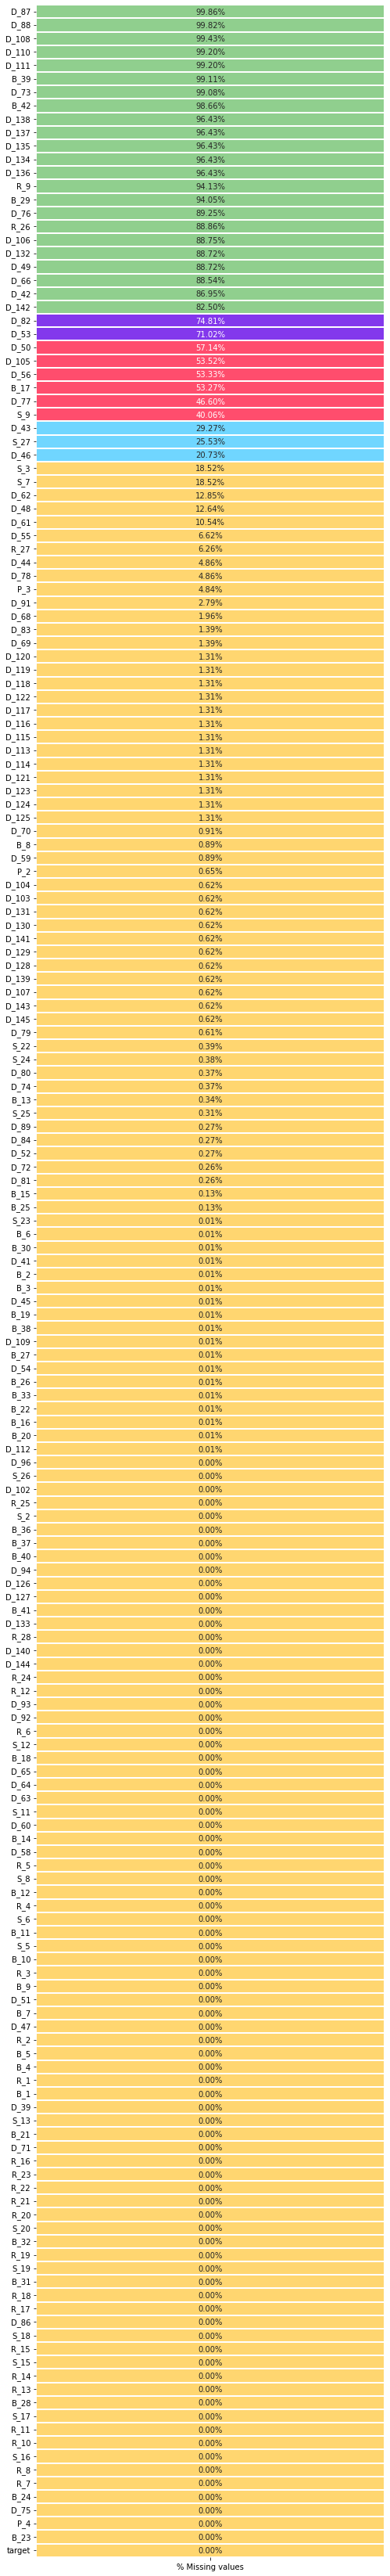

In [15]:
# Percentage of missing values in each feature.
background_color = 'white'
missing = pd.DataFrame(columns = ['% Missing values'],data = df_train.isnull().sum().sort_values(ascending=False)/len(df_train))
fig = plt.figure(figsize = (20, 60),facecolor=background_color)
gs = fig.add_gridspec(1, 2)
gs.update(wspace = 0.5, hspace = 0.5)
ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top","bottom","left"]:
    ax0.spines[s].set_visible(False)
sns.heatmap(missing,cbar = False,annot = True,fmt =".2%", linewidths = 2,cmap = custom_colors,vmax = 1, ax = ax0)
plt.show()

In [16]:
target_class = pd.DataFrame({'count': df_train.target.value_counts(),
                             'percentage': df_train['target'].value_counts() / df_train.shape[0] * 100
})
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Pie(values = target_class['count'],labels = target_class.index,hole = 0.6, 
                     hoverinfo ='label+percent'))
fig.update_traces(textfont_size = 12, hoverinfo ='label+percent',textinfo ='label', 
                  showlegend = False,marker = dict(colors =["#90cf8e","#ff70a6"]),
                  title = dict(text = 'Target Distribution'))  
fig.show()

In [21]:
stat_plot = df_train.reset_index().groupby('S_2')['customer_ID'].nunique().reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(x = stat_plot['S_2'], y = stat_plot['customer_ID']))
fig.update_layout(title="Customer Statements", width = 800, height = 600,xaxis_title ='Statement Date',
                  paper_bgcolor='rgb(0,0,0,0)',plot_bgcolor='rgb(0,0,0,0)',yaxis_title='No. of Customers receiving Statement') 
fig['data'][0]['line']['color']="#ff9770"
fig.show()

In [22]:
_ = gc.collect()

In [23]:
del_cols = [c for c in df_train.columns if (c.startswith(('D','t'))) & (c not in cat_cols)]
df_del = df_train[del_cols]
spd_cols = [c for c in df_train.columns if (c.startswith(('S','t'))) & (c not in cat_cols)]
df_spd = df_train[spd_cols]
pay_cols = [c for c in df_train.columns if (c.startswith(('P','t'))) & (c not in cat_cols)]
df_pay = df_train[pay_cols]
bal_cols = [c for c in df_train.columns if (c.startswith(('B','t'))) & (c not in cat_cols)]
df_bal = df_train[bal_cols]
ris_cols = [c for c in df_train.columns if (c.startswith(('R','t'))) & (c not in cat_cols)]
df_ris = df_train[ris_cols]

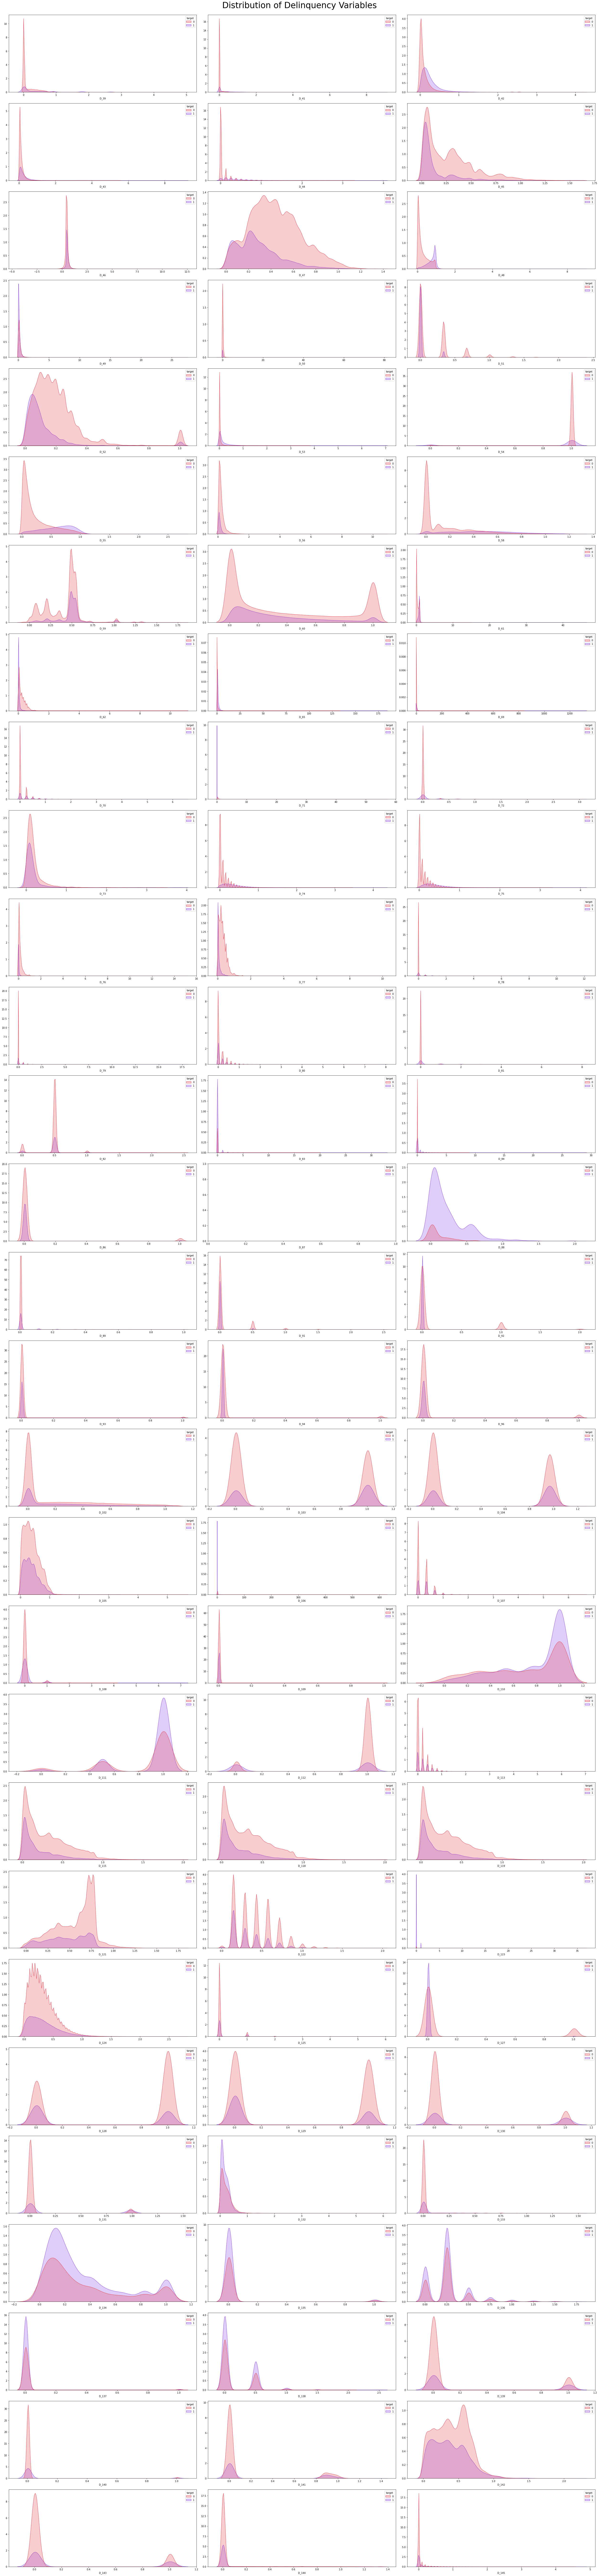

In [24]:
fig, axes = plt.subplots(29, 3, figsize = (35,150))
for i, ax in enumerate(axes.reshape(-1)):
    if i < len(del_cols) - 1:
        sns.kdeplot(x = del_cols[i], hue='target', data = df_del, fill = True, ax = ax, palette =["#e63946","#8338ec"])
        ax.tick_params()
        ax.xaxis.get_label()
        ax.set_ylabel('')
fig.suptitle('Distribution of Delinquency Variables', fontsize = 35, x = 0.5, y = 1)
plt.tight_layout()
plt.show()

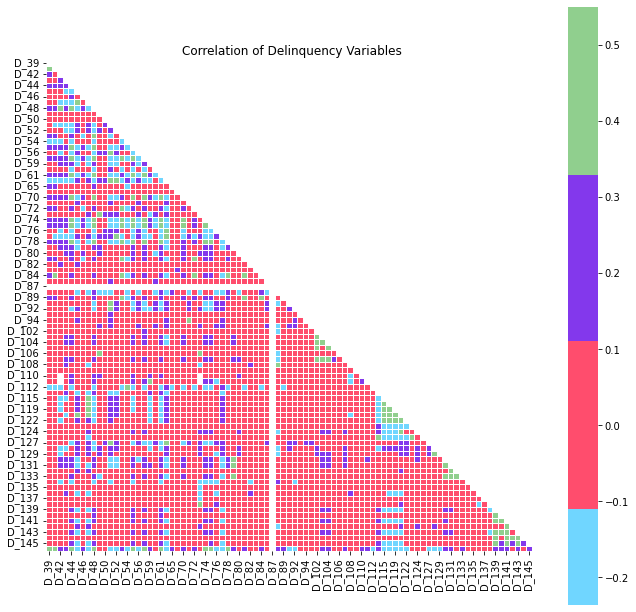

In [25]:
plt.figure(figsize =(11,11))
corr = df_del.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, linewidths =.6, cmap = custom_colors)
plt.title('Correlation of Delinquency Variables')
plt.show()

There are number of missing correlations, particularly in D_87, due to heavily null values. 

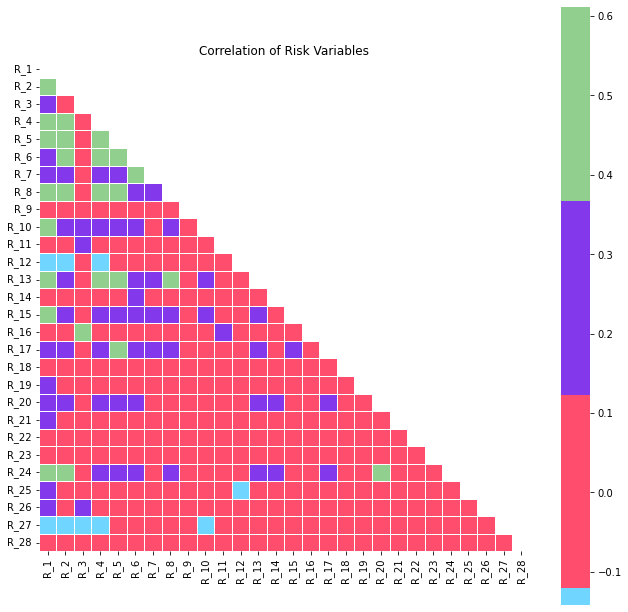

In [26]:
R_cols = [c for c in df_train.columns if (c.startswith(('R')))]
df_R = df_train[R_cols]

plt.figure(figsize=(11,11))
corr = df_R.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0, square = True, linewidths =.6, cmap = custom_colors)
plt.title('Correlation of Risk Variables')
plt.show()

In [21]:
palette = cycle(["#ffd670","#70d6ff","#ff4d6d","#8338ec","#90cf8e"])
targ = df_train.corrwith(df_train['target'], axis=0).sort_values()
val = [str(round(v ,1) *100) + '%' for v in targ.values]
fig = go.Figure()
fig.add_trace(go.Bar(y=targ.index, x= targ.values, orientation='h',text = val, marker_color = next(palette)))
fig.update_layout(title = "Correlation of variables with Target",width = 750, height = 3500,
                  paper_bgcolor='rgb(0,0,0,0)',plot_bgcolor='rgb(0,0,0,0)')

In [17]:
_ = gc.collect()

In [16]:
pal, color=['#016CC9','#DEB078'], ['#8DBAE2','#EDD3B3']
target=pd.DataFrame(data={'Default':df_train.groupby('S_2')['target'].mean()*100})
target['Paid']=np.abs(df_train.groupby('S_2')['target'].mean()-1)*100
rgb=['rgba'+str(matplotlib.colors.to_rgba(i,0.7)) for i in pal]
fig=go.Figure()
fig.add_trace(go.Bar(x=target.index, y=target.Paid, name='Paid',
                     text=target.Paid, texttemplate='%{text:.0f}%', 
                     textposition='inside',insidetextanchor="middle",
                     marker=dict(color=color[0],line=dict(color=pal[0],width=1.5)),
                     hovertemplate = "<b>%{x}</b><br>Paid accounts: %{y:.2f}%"))
fig.add_trace(go.Bar(x=target.index, y=target.Default, name='Default',
                     text=target.Default, texttemplate='%{text:.0f}%', 
                     textposition='inside',insidetextanchor="middle",
                     marker=dict(color=color[1],line=dict(color=pal[1],width=1.5)),
                     hovertemplate = "<b>%{x}</b><br>Default accounts: %{y:.2f}%"))
fig.update_layout(template=temp,title='Distribution of Default by Day', 
                  barmode='relative', yaxis_ticksuffix='%', width=1400,
                  legend=dict(orientation="h", traceorder="reversed", yanchor="bottom",y=1.1,xanchor="left", x=0))
fig.show()

About 25% of customers in the training data have defaulted. This proportion is consistent across each day in the training set, with a weekly seasonal trend in the day of the month when customers receive their statements.

In [2]:
df_train = pd.read_feather('../input/amexfeather/train_data.ftr')

In [26]:
customer_data_length = df_train.customer_ID.value_counts()
for col in ["P_2"]:
    fig = go.Figure()
    for customer_id in list(customer_data_length.index[:5]):
        fig.add_trace(go.Scatter(x=df_train.loc[df_train.customer_ID==customer_id, "S_2"],
                                 y=df_train.loc[df_train.customer_ID==customer_id, col].astype(np.float32),
                                 name=customer_id))
    fig.update_layout(title=f"{col} Value Over Time For Some Customers", xaxis=dict(title="Date", automargin=True), yaxis_title=col,
                      legend=dict(orientation="h", y=-0.2))
    fig.show()

In [28]:
cat_columns = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
non_cat_columns = set(df_train.columns) - set(cat_columns)
p_columns = [col for col in non_cat_columns if "P_" in col]

In [36]:
for p_col in p_columns:
    df_train[p_col] = df_train[p_col].astype("float32")

In [38]:
def skewness_level(x):
    if np.abs(x) > 1:
        return "high"
    elif -0.5 <= x <= 0.5:
        return "symmetrical"
    else:
        return "moderate"
# .agg(["skew"]) only works for float32 dtype
p_skewness = df_train[p_columns].agg(["skew"]).T
p_skewness["skewness_level"] = p_skewness["skew"].apply(lambda x :skewness_level(x))
p_skewness

,skew,skewness_level
P_2,-0.626374,moderate
P_4,2.026448,high
P_3,-1.163765,high


In [37]:
df_train['P_2'].agg(["skew"])

skew   -0.626374
Name: P_2, dtype: float32

In [3]:
cust_presence = df_train.groupby(['customer_ID','target']).size().reset_index().rename(columns={0:'presence'})
cust_presence.head()

,customer_ID,target,presence
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,13
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0,13
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0,13
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0,13
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0,13


In [7]:
print('Maximum presence of a customer = ', cust_presence['presence'].max())
print('Minimum presence of a customer = ', cust_presence['presence'].min())

Maximum presence of a customer =  13
Minimum presence of a customer =  1
